In [1]:
import requests
from bs4 import BeautifulSoup

In [41]:
base_site = "https://www.letudiant.fr/etudes/annuaire-enseignement-superieur/etablissement/etablissement-estiam-82456.html"

response = requests.get(base_site)
response.status_code

200

In [3]:
html = response.content
html[:100]

b'<!DOCTYPE html>\n<!--[if lte IE 9]><html class="ie"><![endif]-->\n<!--[if gt IE 9]><!-->\n<html xmlns="'

In [4]:
soup = BeautifulSoup(html, 'html.parser')

In [11]:
with open('projet_pedagogique.html', 'wb') as file:
    file.write(soup.prettify('utf-8'))

In [5]:
soup

<!DOCTYPE html>

<!--[if lte IE 9]><html class="ie"><![endif]-->
<!--[if gt IE 9]><!-->
<html lang="fr" prefix="og:http://ogp.me/ns#" xml:lang="fr" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Estiam, Paris (75) - Letudiant.fr</title>
<meta content="Estiam, Paris (75) - Letudiant.fr" name="title"/>
<meta content="Estiam, Paris (75) : retrouvez sur Letudiant.fr toutes les informations pratiques pour Estiam, ainsi que les formations proposées." name="description"/>
<meta content="max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
<meta content="max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="googlebot"/>
<meta content="Estiam, Paris (75)" name="keywords"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta charset="utf-8"/>
<meta content="width=device-width, minimum-

In [5]:
soup.find_all('a')

[<a href="http://www3.smartadserver.com/call/pubjumpi/11088/82603/4833/S/[timestamp]/?" target="_blank">
 <img alt="" border="0" src="http://www3.smartadserver.com/call/pubi/11088/82603/4833/S/[timestamp]/?"/>
 </a>,
 <a class="c-hamburger c-header-primary__hamburger" data-sty-reveal="main" href="https://www.letudiant.fr"> <div class="c-hamburger__bar"></div> <div class="c-hamburger__bar"></div> <div class="c-hamburger__bar"></div> </a>,
 <a class="c-header-primary__logo" href="https://www.letudiant.fr"> <img alt="Logo de L'Etudiant.fr" class="c-header-primary__logo__img" src="https://www.letudiant.fr/etucmsEtuPlugin/images/header/logo.png"/> </a>,
 <a class="c-header__newsletter-link" data-sso-x-site="true" data-sso-x-site-host="https://my.letudiant.fr" data-sso-x-site-redirect-uri="https://my.letudiant.fr/tableau-de-bord/newsletters" data-sso-x-site-service="NEWSLETTER" data-sso-x-site-trigram="ETU_ETU" href="https://www.letudiant.fr/formulaire/inscription/newsletter.html" title="S'i

In [9]:
soup.find('video')

In [10]:
print(soup.find('video'))

None


In [11]:
type(soup.find('video'))

NoneType

In [6]:
divs = soup.find_all('div', attrs={'class': 'c-box--wire__section'})
divs

[<div class="c-box--wire__section c-box--wire__section--main">
 <h3 class="c-box--wire__section--main__header">
 <a class="c-box--wire__section--main__header__title" href="/etudes/annuaire-enseignement-superieur/formation/manager-de-projet-1.html">
                             MBA Data Solutions and New Ways of Working                        </a>
 <div class="c-box--wire__section--main__header__section">Alternance</div>
 </h3>
 <p class="c-box--wire__section--main__parag">
                         Titre d'établissement. RNCP niveau 7. <br/>Organisme responsable de la certification : Ecole supérieure européenne de management en alternance ECEMA<br/><b>Admission en première année</b> :<br/> - bac + 3 ; dossier, test(s), entretien.<br/>inscription : jusquà septembre<br/><b>Scolarité :</b><br/>- Contrat de professionnalisation : Durée des études : entre 1 et 2 Année(s).  <br/>- Scolarité classique : Durée des études : 2 Année(s). Frais de scolarité : 6800 € Par an<br/> </p>
 <footer class=

### Extraire le nom et la date de publication

In [7]:
[div.find('div', {'class': 'c-avis__user__info__resume__name'}) for div in divs]

[None,
 None,
 <div class="c-avis__user__info__resume__name">
                                                     enzodb                        
                         publié le
                         04/09/2020                    </div>,
 None,
 <div class="c-avis__user__info__resume__name">
                                                     Soukayna BAHAJJI                        
                         publié le
                         14/08/2020                    </div>,
 None,
 <div class="c-avis__user__info__resume__name">
                                                     Salisali                        
                         publié le
                         06/05/2020                    </div>,
 None,
 <div class="c-avis__user__info__resume__name">
                                                     root                        
                         publié le
                         22/08/2019                    </div>,
 None,
 <div class="c-avis__user__i

In [8]:
full_name_date = [None if div.find('div', {'class': 'c-avis__user__info__resume__name'}) is None else div.find('div', {'class': 'c-avis__user__info__resume__name'}).string.strip().replace("\n", "").replace("", "") for div in divs]
full_name_date

[None,
 None,
 'enzodb                                                publié le                        04/09/2020',
 None,
 'Soukayna BAHAJJI                                                publié le                        14/08/2020',
 None,
 'Salisali                                                publié le                        06/05/2020',
 None,
 'root                                                publié le                        22/08/2019',
 None,
 'Pseudonyme                                                publié le                        08/05/2019',
 None,
 'Hg                                                publié le                        07/05/2019',
 None,
 'Anonyme                                                publié le                        06/05/2019',
 None,
 'Pseufonormal                                                publié le                        26/04/2019',
 None,
 'estiamien                                                publié le                        21/12

In [9]:
[div.find('p', {'class': 'c-avis__user__comment'}) for div in divs]

[None,
 None,
 <p class="c-avis__user__comment">
 </p>,
 None,
 <p class="c-avis__user__comment">
                     Une école parfaite en terme d'apprentissage, d'organisation, vie étudiant et d’accompagnement que ce soit au sein de l'école ou à l’extérieur pour la recherche d'alternance ou de contrat d'apprentissage, une équipe administrative toujours disponible pour la satisfaction et pour répondre aux besoins des étudiants, une très bonne qualité du contenu de la formation et des intervenants très compétent techniquement et pédagogique.                </p>,
 None,
 <p class="c-avis__user__comment">
                     Mon fils est ravi d'être dans cette école, les profs très professionnels, domage qu'il n'y a pas assez de publicité pour se fait connaître cet établissement.                </p>,
 None,
 <p class="c-avis__user__comment">
                     Après un BTS en informatique, j'ai intégré l'ESTIAM en 3ème année et je suis très content de mon choix. J'ai choisi l'ESTIAM 

In [11]:
comments = [None if div.find('p', {'class': 'c-avis__user__comment'}) is None else div.find('p', {'class': 'c-avis__user__comment'}).string.strip() for div in divs]
comments

[None,
 None,
 '',
 None,
 "Une école parfaite en terme d'apprentissage, d'organisation, vie étudiant et d’accompagnement que ce soit au sein de l'école ou à l’extérieur pour la recherche d'alternance ou de contrat d'apprentissage, une équipe administrative toujours disponible pour la satisfaction et pour répondre aux besoins des étudiants, une très bonne qualité du contenu de la formation et des intervenants très compétent techniquement et pédagogique.",
 None,
 "Mon fils est ravi d'être dans cette école, les profs très professionnels, domage qu'il n'y a pas assez de publicité pour se fait connaître cet établissement.",
 None,
 "Après un BTS en informatique, j'ai intégré l'ESTIAM en 3ème année et je suis très content de mon choix. J'ai choisi l'ESTIAM car le programme est très à la pointe des dernières technologies. De plus le nombre d'heures de cours était clairement indiqué, ce qui n'est pas le cas de toutes les écoles. L'école est à Paris, ce qui est très pratique pour aller à des 

In [42]:
import pandas as pd
import numpy as np
from googletrans import Translator

#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [31]:
TextBlob("The movie is dirty").sentiment

Sentiment(polarity=-0.6, subjectivity=0.8)

In [13]:
comments_info = pd.DataFrame()

comments_info['Comments'] = comments

comments_info

,Comments
0,None
1,None
2,
3,None
4,"Une école parfaite en terme d'apprentissage, d..."
5,None
6,"Mon fils est ravi d'être dans cette école, les..."
7,None
8,"Après un BTS en informatique, j'ai intégré l'E..."
9,None


In [14]:
pd.set_option('display.max_colwidth', None)
comments_info

,Comments
0,None
1,None
2,
3,None
4,"Une école parfaite en terme d'apprentissage, d'organisation, vie étudiant et d’accompagnement que ce soit au sein de l'école ou à l’extérieur pour la recherche d'alternance ou de contrat d'apprentissage, une équipe administrative toujours disponible pour la satisfaction et pour répondre aux besoins des étudiants, une très bonne qualité du contenu de la formation et des intervenants très compétent techniquement et pédagogique."
5,None
6,"Mon fils est ravi d'être dans cette école, les profs très professionnels, domage qu'il n'y a pas assez de publicité pour se fait connaître cet établissement."
7,None
8,"Après un BTS en informatique, j'ai intégré l'ESTIAM en 3ème année et je suis très content de mon choix. J'ai choisi l'ESTIAM car le programme est très à la pointe des dernières technologies. De plus le nombre d'heures de cours était clairement indiqué, ce qui n'est pas le cas de toutes les écoles. L'école est à Paris, ce qui est très pratique pour aller à des conférences et pour trouver un stage. Les cours se déroulent dans une ambiance cool et studieuse. Les locaux sont tout neufs et les salles de cours agréables. Je recommande cette école!"
9,None


In [24]:
comments_info.to_("comments_info.csv", index=False, header=True)

In [29]:
comments_info.to_json("comment_info.json", indent=4)

In [17]:
# comment_infos
comments_info = comments_info.dropna()
comments_info

,Comments
2,
4,"Une école parfaite en terme d'apprentissage, d'organisation, vie étudiant et d’accompagnement que ce soit au sein de l'école ou à l’extérieur pour la recherche d'alternance ou de contrat d'apprentissage, une équipe administrative toujours disponible pour la satisfaction et pour répondre aux besoins des étudiants, une très bonne qualité du contenu de la formation et des intervenants très compétent techniquement et pédagogique."
6,"Mon fils est ravi d'être dans cette école, les profs très professionnels, domage qu'il n'y a pas assez de publicité pour se fait connaître cet établissement."
8,"Après un BTS en informatique, j'ai intégré l'ESTIAM en 3ème année et je suis très content de mon choix. J'ai choisi l'ESTIAM car le programme est très à la pointe des dernières technologies. De plus le nombre d'heures de cours était clairement indiqué, ce qui n'est pas le cas de toutes les écoles. L'école est à Paris, ce qui est très pratique pour aller à des conférences et pour trouver un stage. Les cours se déroulent dans une ambiance cool et studieuse. Les locaux sont tout neufs et les salles de cours agréables. Je recommande cette école!"
10,.
12,"Je laisse un commentaire, parce que je suis assez étonné des derniers qui ont été publié.\n\nJe suis très content d'être à l'ESTIAM. C'est une bonne école, avec en moyenne des bons profs. Il y a parfois des soucis, mais pas plus que dans toutes école. Au moins on se sent écouté et l'équipe a mis en oeuvre pas mal de chose depuis le début d'année pour satisfaire les plus éxigents.\n\nAlors je lis des commentaires sur le wifi ou les distributeurs et sa me fait rire: c'est des trucs qui sont réglés depuis longtemps et qui était externe à l'école.\n\nD'ailleurs dans les commentaires, il y a quelqu'un qui raconte n'importe quoi (au sujet du diplôme et tout sa…), ça sent la campagne d'attaque d'une école concurrente...\n\nSi je devais conseiller l'ESTIAM à mes potes, je le ferai. Je l'ai fait d'ailleurs!\n\nTiens, je rempli les étoiles et je me rends compte que la plupart des gens ont rien mis pour bibliothèques: tout est en ligne! On a accès à plein de supports de cours et toute la bibliothèque ENI depuis le portail des étudiants."
14,
16,"Ce n'est pas une école c'est un arnaque, vraiment zéro organisation, c'est grâce aux élèves que l'école vie toujours je pense"
18,"Une formation inégale due à une grande fourchette de niveaux à l'entrée : si on sait déjà on s'ennuie, si on ne sait pas ça va trop vite. Le dossier à l'entrée est là pour donner l'illusion d'une sélection, mais on se retrouve avec de tous les niveaux dans toutes les formations.\nAu cours de mes 2 ans là bas, l'administration a rencontré de nombreux conflits pour la gestion des cours, des plannings...\nL'équipe se rattrape par la bonne volonté et la bonne humeur de certains accompagnant, et d'un sérieux vis à vis des relations professionnelles que la formation apporte."
20,"Une formation inégale due à une grande fourchette de niveaux à l'entrée : si on sait déjà on s'ennuie, si on ne sait pas ça va trop vite. Le dossier à l'entrée est là pour donner l'illusion d'une sélection, mais on se retrouve avec de tous les niveaux dans toutes les formations.\nAu cours de mes 2 ans là bas, l'administration a rencontré de nombreux conflits pour la gestion des cours, des plannings...\nL'équipe se rattrape par la bonne volonté et la bonne humeur de certains accompagnant, et d'un sérieux vis à vis des relations professionnelles que la formation apporte."


In [20]:
comments_info = comments_info.replace(r'^\s*$', np.NaN, regex=True)
comments_info
# comment_infos = comments_info.drop(labels=None,axis=0,index=None,columns=None,level=None,inplace=True)
# comments_info.to_csv("comments_infos_finally.csv", encoding='utf-8', index=False, header=True)

,Comments
2,NaN
4,"Une école parfaite en terme d'apprentissage, d'organisation, vie étudiant et d’accompagnement que ce soit au sein de l'école ou à l’extérieur pour la recherche d'alternance ou de contrat d'apprentissage, une équipe administrative toujours disponible pour la satisfaction et pour répondre aux besoins des étudiants, une très bonne qualité du contenu de la formation et des intervenants très compétent techniquement et pédagogique."
6,"Mon fils est ravi d'être dans cette école, les profs très professionnels, domage qu'il n'y a pas assez de publicité pour se fait connaître cet établissement."
8,"Après un BTS en informatique, j'ai intégré l'ESTIAM en 3ème année et je suis très content de mon choix. J'ai choisi l'ESTIAM car le programme est très à la pointe des dernières technologies. De plus le nombre d'heures de cours était clairement indiqué, ce qui n'est pas le cas de toutes les écoles. L'école est à Paris, ce qui est très pratique pour aller à des conférences et pour trouver un stage. Les cours se déroulent dans une ambiance cool et studieuse. Les locaux sont tout neufs et les salles de cours agréables. Je recommande cette école!"
10,.
12,"Je laisse un commentaire, parce que je suis assez étonné des derniers qui ont été publié.\n\nJe suis très content d'être à l'ESTIAM. C'est une bonne école, avec en moyenne des bons profs. Il y a parfois des soucis, mais pas plus que dans toutes école. Au moins on se sent écouté et l'équipe a mis en oeuvre pas mal de chose depuis le début d'année pour satisfaire les plus éxigents.\n\nAlors je lis des commentaires sur le wifi ou les distributeurs et sa me fait rire: c'est des trucs qui sont réglés depuis longtemps et qui était externe à l'école.\n\nD'ailleurs dans les commentaires, il y a quelqu'un qui raconte n'importe quoi (au sujet du diplôme et tout sa…), ça sent la campagne d'attaque d'une école concurrente...\n\nSi je devais conseiller l'ESTIAM à mes potes, je le ferai. Je l'ai fait d'ailleurs!\n\nTiens, je rempli les étoiles et je me rends compte que la plupart des gens ont rien mis pour bibliothèques: tout est en ligne! On a accès à plein de supports de cours et toute la bibliothèque ENI depuis le portail des étudiants."
14,NaN
16,"Ce n'est pas une école c'est un arnaque, vraiment zéro organisation, c'est grâce aux élèves que l'école vie toujours je pense"
18,"Une formation inégale due à une grande fourchette de niveaux à l'entrée : si on sait déjà on s'ennuie, si on ne sait pas ça va trop vite. Le dossier à l'entrée est là pour donner l'illusion d'une sélection, mais on se retrouve avec de tous les niveaux dans toutes les formations.\nAu cours de mes 2 ans là bas, l'administration a rencontré de nombreux conflits pour la gestion des cours, des plannings...\nL'équipe se rattrape par la bonne volonté et la bonne humeur de certains accompagnant, et d'un sérieux vis à vis des relations professionnelles que la formation apporte."
20,"Une formation inégale due à une grande fourchette de niveaux à l'entrée : si on sait déjà on s'ennuie, si on ne sait pas ça va trop vite. Le dossier à l'entrée est là pour donner l'illusion d'une sélection, mais on se retrouve avec de tous les niveaux dans toutes les formations.\nAu cours de mes 2 ans là bas, l'administration a rencontré de nombreux conflits pour la gestion des cours, des plannings...\nL'équipe se rattrape par la bonne volonté et la bonne humeur de certains accompagnant, et d'un sérieux vis à vis des relations professionnelles que la formation apporte."


In [63]:
comments_info.dropna(subset = ["Comments"], inplace=True)
comments_info

,Comments,English,pol
4,"Une école parfaite en terme d'apprentissage, d'organisation, vie étudiant et d’accompagnement que ce soit au sein de l'école ou à l’extérieur pour la recherche d'alternance ou de contrat d'apprentissage, une équipe administrative toujours disponible pour la satisfaction et pour répondre aux besoins des étudiants, une très bonne qualité du contenu de la formation et des intervenants très compétent techniquement et pédagogique.","Perfect school in terms of learning, organization, student life and support whether in school or out to research alternate or apprenticeship contract, an administrative team always available to satisfy and meet the needs of students, a very good quality of training content and technically very competent and educational stakeholders.",1.0
6,"Mon fils est ravi d'être dans cette école, les profs très professionnels, domage qu'il n'y a pas assez de publicité pour se fait connaître cet établissement.","My son is delighted to be in this school, the teachers very professional, shame there is not enough advertising became known this property.",1.0
8,"Après un BTS en informatique, j'ai intégré l'ESTIAM en 3ème année et je suis très content de mon choix. J'ai choisi l'ESTIAM car le programme est très à la pointe des dernières technologies. De plus le nombre d'heures de cours était clairement indiqué, ce qui n'est pas le cas de toutes les écoles. L'école est à Paris, ce qui est très pratique pour aller à des conférences et pour trouver un stage. Les cours se déroulent dans une ambiance cool et studieuse. Les locaux sont tout neufs et les salles de cours agréables. Je recommande cette école!","After a BTS computer, I joined ESTIAM the 3rd year and I am very happy with my choice. I chose ESTIAM because the program is at the forefront of the latest technologies. Also the number of lessons was clear, which is not the case for all schools. The school is in Paris, which is very convenient to conferences and to find an internship. Classes are held in a cool and studious atmosphere. The premises are new and pleasant classrooms. I recommend this school!",1.0
10,.,.,0.0
12,"Je laisse un commentaire, parce que je suis assez étonné des derniers qui ont été publié.\n\nJe suis très content d'être à l'ESTIAM. C'est une bonne école, avec en moyenne des bons profs. Il y a parfois des soucis, mais pas plus que dans toutes école. Au moins on se sent écouté et l'équipe a mis en oeuvre pas mal de chose depuis le début d'année pour satisfaire les plus éxigents.\n\nAlors je lis des commentaires sur le wifi ou les distributeurs et sa me fait rire: c'est des trucs qui sont réglés depuis longtemps et qui était externe à l'école.\n\nD'ailleurs dans les commentaires, il y a quelqu'un qui raconte n'importe quoi (au sujet du diplôme et tout sa…), ça sent la campagne d'attaque d'une école concurrente...\n\nSi je devais conseiller l'ESTIAM à mes potes, je le ferai. Je l'ai fait d'ailleurs!\n\nTiens, je rempli les étoiles et je me rends compte que la plupart des gens ont rien mis pour bibliothèques: tout est en ligne! On a accès à plein de supports de cours et toute la bibliothèque ENI depuis le portail des étudiants.","I leave a comment, because I am quite surprised that the last published.\n\nI am very happy to be at the ESTIAM. This is a good school with good teachers on average. Sometimes there are concerns, but no more than in any school. At least it feels listened to and the team has implemented a lot of things since the beginning of the year to satisfy the most exigent.\n\nThen I read comments on wifi or distributors and makes me laugh: it's stuff that are set for a long time and that was external to the school.\n\nBesides, in the comments, there is someone who says anything (about the diploma and all its ...), it smells attack campaign of a rival school ...\n\nIf I were advising the ESTIAM to my friends, I will. I did it matter!\n\nHere, I met the stars and I realize that most people have nothing to put libraries:

In [173]:
comments_info.to_csv("comments_info.csv", index=False, header=True,encoding='utf-8')

In [48]:
translator = Translator()         
df = pd.DataFrame(comments_info)
df['English'] = df['Comments'].apply(translator.translate,src='fr',dest='en').apply(getattr, args=('text',))
df

,Comments,English
4,"Une école parfaite en terme d'apprentissage, d'organisation, vie étudiant et d’accompagnement que ce soit au sein de l'école ou à l’extérieur pour la recherche d'alternance ou de contrat d'apprentissage, une équipe administrative toujours disponible pour la satisfaction et pour répondre aux besoins des étudiants, une très bonne qualité du contenu de la formation et des intervenants très compétent techniquement et pédagogique.","Perfect school in terms of learning, organization, student life and support whether in school or out to research alternate or apprenticeship contract, an administrative team always available to satisfy and meet the needs of students, a very good quality of training content and technically very competent and educational stakeholders."
6,"Mon fils est ravi d'être dans cette école, les profs très professionnels, domage qu'il n'y a pas assez de publicité pour se fait connaître cet établissement.","My son is delighted to be in this school, the teachers very professional, shame there is not enough advertising became known this property."
8,"Après un BTS en informatique, j'ai intégré l'ESTIAM en 3ème année et je suis très content de mon choix. J'ai choisi l'ESTIAM car le programme est très à la pointe des dernières technologies. De plus le nombre d'heures de cours était clairement indiqué, ce qui n'est pas le cas de toutes les écoles. L'école est à Paris, ce qui est très pratique pour aller à des conférences et pour trouver un stage. Les cours se déroulent dans une ambiance cool et studieuse. Les locaux sont tout neufs et les salles de cours agréables. Je recommande cette école!","After a BTS computer, I joined ESTIAM the 3rd year and I am very happy with my choice. I chose ESTIAM because the program is at the forefront of the latest technologies. Also the number of lessons was clear, which is not the case for all schools. The school is in Paris, which is very convenient to conferences and to find an internship. Classes are held in a cool and studious atmosphere. The premises are new and pleasant classrooms. I recommend this school!"
10,.,.
12,"Je laisse un commentaire, parce que je suis assez étonné des derniers qui ont été publié.\n\nJe suis très content d'être à l'ESTIAM. C'est une bonne école, avec en moyenne des bons profs. Il y a parfois des soucis, mais pas plus que dans toutes école. Au moins on se sent écouté et l'équipe a mis en oeuvre pas mal de chose depuis le début d'année pour satisfaire les plus éxigents.\n\nAlors je lis des commentaires sur le wifi ou les distributeurs et sa me fait rire: c'est des trucs qui sont réglés depuis longtemps et qui était externe à l'école.\n\nD'ailleurs dans les commentaires, il y a quelqu'un qui raconte n'importe quoi (au sujet du diplôme et tout sa…), ça sent la campagne d'attaque d'une école concurrente...\n\nSi je devais conseiller l'ESTIAM à mes potes, je le ferai. Je l'ai fait d'ailleurs!\n\nTiens, je rempli les étoiles et je me rends compte que la plupart des gens ont rien mis pour bibliothèques: tout est en ligne! On a accès à plein de supports de cours et toute la bibliothèque ENI depuis le portail des étudiants.","I leave a comment, because I am quite surprised that the last published.\n\nI am very happy to be at the ESTIAM. This is a good school with good teachers on average. Sometimes there are concerns, but no more than in any school. At least it feels listened to and the team has implemented a lot of things since the beginning of the year to satisfy the most exigent.\n\nThen I read comments on wifi or distributors and makes me laugh: it's stuff that are set for a long time and that was external to the school.\n\nBesides, in the comments, there is someone who says anything (about the diploma and all its ...), it smells attack campaign of a rival school ...\n\nIf I were advising the ESTIAM to my friends, I will. I did it matter!\n\nHere, I met the stars and I realize that most people have nothing to put libraries: everything is onlin

In [51]:
TextBlob("the movie was bad").sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [54]:
pol = []
for i in comments_info.English.values:
    try:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    except:
        pol.append(0)

In [55]:
comments_info['pol'] = pol

In [56]:
comments_info['pol'][comments_info.pol==0] = 0
comments_info['pol'][comments_info.pol > 0]= 1
comments_info['pol'][comments_info.pol < 0]= -1

In [58]:
df_positive = comments_info[comments_info.pol==1]
df_positive.head(5)

,Comments,English,pol
4,"Une école parfaite en terme d'apprentissage, d'organisation, vie étudiant et d’accompagnement que ce soit au sein de l'école ou à l’extérieur pour la recherche d'alternance ou de contrat d'apprentissage, une équipe administrative toujours disponible pour la satisfaction et pour répondre aux besoins des étudiants, une très bonne qualité du contenu de la formation et des intervenants très compétent techniquement et pédagogique.","Perfect school in terms of learning, organization, student life and support whether in school or out to research alternate or apprenticeship contract, an administrative team always available to satisfy and meet the needs of students, a very good quality of training content and technically very competent and educational stakeholders.",1.0
6,"Mon fils est ravi d'être dans cette école, les profs très professionnels, domage qu'il n'y a pas assez de publicité pour se fait connaître cet établissement.","My son is delighted to be in this school, the teachers very professional, shame there is not enough advertising became known this property.",1.0
8,"Après un BTS en informatique, j'ai intégré l'ESTIAM en 3ème année et je suis très content de mon choix. J'ai choisi l'ESTIAM car le programme est très à la pointe des dernières technologies. De plus le nombre d'heures de cours était clairement indiqué, ce qui n'est pas le cas de toutes les écoles. L'école est à Paris, ce qui est très pratique pour aller à des conférences et pour trouver un stage. Les cours se déroulent dans une ambiance cool et studieuse. Les locaux sont tout neufs et les salles de cours agréables. Je recommande cette école!","After a BTS computer, I joined ESTIAM the 3rd year and I am very happy with my choice. I chose ESTIAM because the program is at the forefront of the latest technologies. Also the number of lessons was clear, which is not the case for all schools. The school is in Paris, which is very convenient to conferences and to find an internship. Classes are held in a cool and studious atmosphere. The premises are new and pleasant classrooms. I recommend this school!",1.0
12,"Je laisse un commentaire, parce que je suis assez étonné des derniers qui ont été publié.\n\nJe suis très content d'être à l'ESTIAM. C'est une bonne école, avec en moyenne des bons profs. Il y a parfois des soucis, mais pas plus que dans toutes école. Au moins on se sent écouté et l'équipe a mis en oeuvre pas mal de chose depuis le début d'année pour satisfaire les plus éxigents.\n\nAlors je lis des commentaires sur le wifi ou les distributeurs et sa me fait rire: c'est des trucs qui sont réglés depuis longtemps et qui était externe à l'école.\n\nD'ailleurs dans les commentaires, il y a quelqu'un qui raconte n'importe quoi (au sujet du diplôme et tout sa…), ça sent la campagne d'attaque d'une école concurrente...\n\nSi je devais conseiller l'ESTIAM à mes potes, je le ferai. Je l'ai fait d'ailleurs!\n\nTiens, je rempli les étoiles et je me rends compte que la plupart des gens ont rien mis pour bibliothèques: tout est en ligne! On a accès à plein de supports de cours et toute la bibliothèque ENI depuis le portail des étudiants.","I leave a comment, because I am quite surprised that the last published.\n\nI am very happy to be at the ESTIAM. This is a good school with good teachers on average. Sometimes there are concerns, but no more than in any school. At least it feels listened to and the team has implemented a lot of things since the beginning of the year to satisfy the most exigent.\n\nThen I read comments on wifi or distributors and makes me laugh: it's stuff that are set for a long time and that was external to the school.\n\nBesides, in the comments, there is someone who says anything (about the diploma and all its ...), it smells attack campaign of a rival school ...\n\nIf I were advising the ESTIAM to my friends, I will. I did it matter!\n\nHere, I met the stars and I realize that most people have nothing to put libraries: everything

In [59]:
df_positive = comments_info[comments_info.pol==-1]
df_positive.head(5)


,Comments,English,pol
24,"Je suis très déçu par cette école. Aucune rigueur quand au suivi des étudiants. Pas de surveillance lors des évaluations, pas de corrigés des évaluations ni d'exercices supplémentaires à faire à la maison. Les programmes sont survolés. Pour une école informatique, il y a aucune salle informatique. Autrement dit on risque d’obtenir notre diplôme avec rien dans la tête. Même une école de seconde chance vaut mieux.\nJ'espère vraiment qu'ils tiendront compte de ces aspects et y remédieront.\nJ'espère que le plus grand nombre de personne auront le temps de voir ce avis avant qu'ils le fasse disparaître aussi (Eh oui je connais une personne qui a vu disparaître son avis google, en une journée car il était très négatif). C'est d'ailleurs cette malhonnêteté qui m'a poussé à mettre un avis, pour empêcher d'autre personne de faire la même erreur que moi. Erreur qui est de choisir cette école en se fiant aux avis positives qu'on trouve sur internet.","I am very disappointed with this school. No rigor when monitoring students. No monitoring during evaluations, not adjusted for additional assessments or exercises to do at home. Programs are flown. For a computer school, there is no computer room. That we may get our degree with nothing in the head. Even a second chance school is better.\nI really hope they take these aspects and will remedy it.\nI hope that more people will have time to see what advice before they do disappear as (Yes I know a person who saw disappear its opinion google in a day because it was very negative). It was this dishonesty that led me to make a review to prevent the other person from making the same mistake as me. Mistake is choosing the school by relying on positive reviews found on internet.",-1.0


In [60]:
df_positive = comments_info[comments_info.pol==0]
df_positive.head(5)

,Comments,English,pol
10,.,.,0.0
26,Ecole à éviter,School to avoid,0.0
48,C’est une école où tu es bien suivi. Ils font ce qu'il faut pour t'aider à réussir.,It is a school where you are being followed. They do what it takes to help you succeed.,0.0


 1.0    18
 0.0     3
-1.0     1
Name: pol, dtype: int64

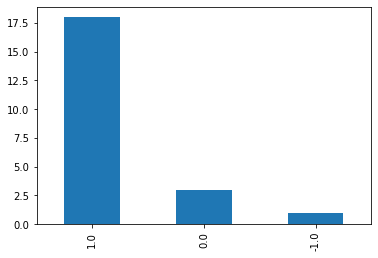

In [64]:
comments_info.pol.value_counts().plot.bar()
comments_info.pol.value_counts()

In [52]:
# comments_info.shape

In [53]:
# comments_info.info()
# comment_infos.describe().transpose()

In [45]:
# comments_info.describe().transpose()

In [44]:
# count = comment_infos.isnull().sum().sort_values(ascending=False)
# percentage = ((comment_infos.isnull().sum()/len(comment_infos)*100)).sort_values(ascending=False)
# missing_data = pd.concat([count, percentage], axis=1, keys=['Count', 'Percentage'])

# print('Count and Percentage of mising values for the columns:')

# missing_data

In [189]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# print('Percentage for default\n')
# print(round(comment_infos.Comments.value_counts(normalize=True)*100,2))
# round(comment_infos.Comments.value_counts(normalize=True)*100,2).plot(kind='bar')
# plt.title('Precentage per comment')
# plt.show()

In [ ]:
# import re
# import string

# def text_clean_1(text):
#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\w*\d\w*', '', text)